# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
# Import libraries
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

#divide dataframe
from sklearn.model_selection import train_test_split as tts

#models
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from lightgbm import LGBMClassifier as LGBMC
from xgboost import XGBClassifier as XGBC

In [2]:
data = pd.read_csv('data_all.csv')
data

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for e in data.select_dtypes('float').columns:
    data[e] = pd.to_numeric(data[e], downcast = 'float')
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float32(785)
memory usage: 348.3 MB


In [13]:
data.dtypes

e      float32
1      float32
2      float32
3      float32
4      float32
        ...   
780    float32
781    float32
782    float32
783    float32
784    float32
Length: 785, dtype: object

In [14]:
data['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.], dtype=float32)

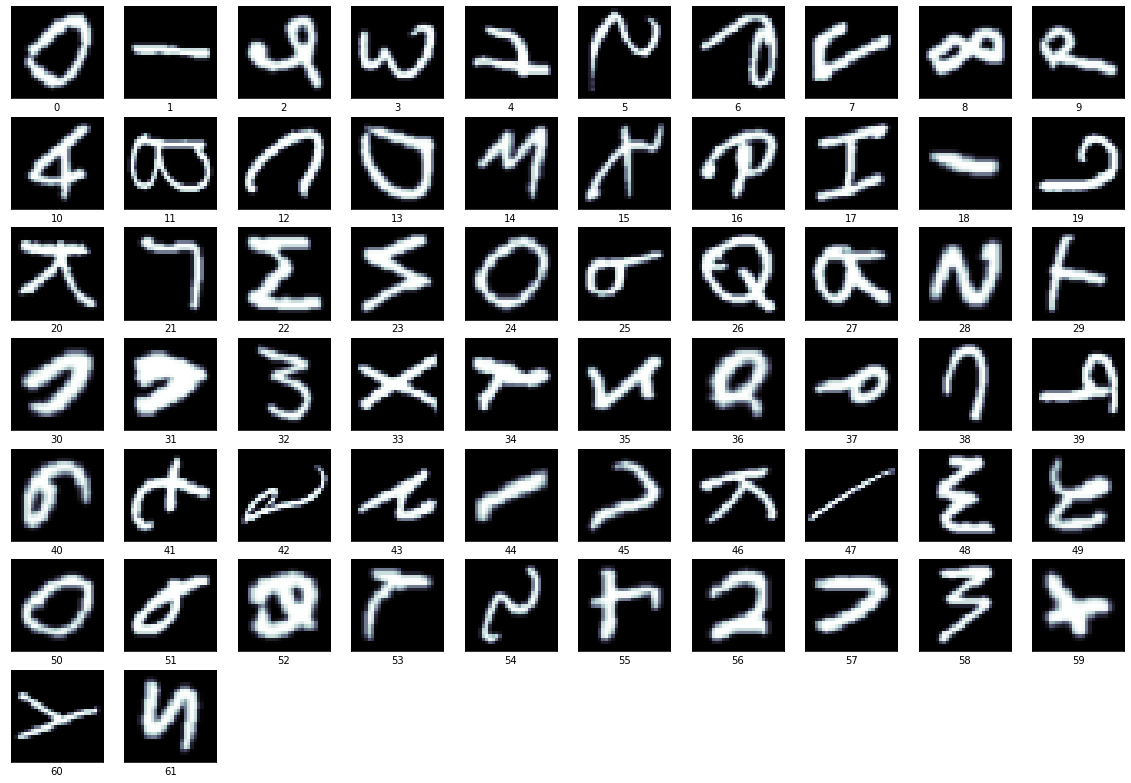

In [15]:
plt.figure(figsize=(20,20))
for i in range(62):
    imagenes = np.array(data[data.e==i].drop("e", axis=1).T)
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[:,1].reshape(28, 28).T, cmap=plt.cm.bone, interpolation='nearest')
    plt.xlabel(i)
plt.show()

##We can clearly see that:
##from 0 to 9: numbers
##form 10 to 35: upper case letters
##form 36 to 61: lower case letters

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float32(785)
memory usage: 348.3 MB


In [17]:
lista_m = [logreg]

def modeling_testing(lista_modelos, data):
    X_train, X_test, y_train, y_test = tts(data.loc[:, data.columns != "e"], data["e"])
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train, y_train)
        train_score = modelo.score(X_train, y_train)
        test_score = modelo.score(X_test, y_test)
        print('Modelo:',str(i).split(".")[-1])
        print('Train score:', train_score,'\nTest score:',test_score,'\n')

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [18]:
mayus = data[(data["e"]>=10)&(data["e"]<=35)]

modeling_testing(lista_m,mayus)

Modelo: LogisticRegression'>
Train score: 0.8892717372809257 
Test score: 0.8222534132959041 



* Try to do the same thing with lowercases.

In [19]:
# Your code here
minus = data[(data["e"]>=36)]

modeling_testing(lista_m,minus)

Modelo: LogisticRegression'>
Train score: 0.8508918892283434 
Test score: 0.7791574279379158 



* Try to do the same thing with numbers.

In [20]:
# Your code here
num = data[(data["e"]<=9)]

modeling_testing(lista_m,num)

Modelo: LogisticRegression'>
Train score: 0.9475113955522814 
Test score: 0.9323204419889503 



My computer died :(, twice.